In [39]:
import pandas as pd
import numpy as np
import PIL
import os
import shutil
import matplotlib.pyplot as plt

## Data Cleaning

In [17]:
# Importing the image metadata
metadata_path = os.path.join("data", "ddi_metadata.csv")
metadata = pd.read_csv(metadata_path)
metadata.head()
metadata = metadata.set_index("DDI_file")

In [24]:
# Formatting the images into the individual classes
src_dir = os.path.join("data","image_data")
dst_dir = os.path.join("data","ddi_images")
if("ddi_images" not in os.listdir("data")):
    os.mkdir(os.path.join("data","ddi_images"))

for filename in os.listdir(src_dir):
    src_path = os.path.join(src_dir, filename)
    disease = metadata.loc[filename]["disease"]
    class_dir  = os.path.join(dst_dir,disease)
    if(not os.path.exists(class_dir)):
        os.mkdir(class_dir)
    dst_path = os.path.join(class_dir,filename)
    
    shutil.copy(src_path, dst_path)
    

In [92]:
#Verify out data cleaning for any loss of data
for dir_name in os.listdir(dst_dir):
    dir_path = os.path.join(dst_dir,dir_name)
    print(dir_name, len(os.listdir(dir_path)))

abrasions-ulcerations-and-physical-injuries 3
abscess 1
acne-cystic 1
acquired-digital-fibrokeratoma 2
acral-melanotic-macule 1
acrochordon 19
actinic-keratosis 4
angioleiomyoma 1
angioma 11
arteriovenous-hemangioma 3
atypical-spindle-cell-nevus-of-reed 1
basal-cell-carcinoma 41
basal-cell-carcinoma-nodular 6
basal-cell-carcinoma-superficial 2
benign-keratosis 3
blastic-plasmacytoid-dendritic-cell-neoplasm 1
blue-nevus 6
cellular-neurothekeoma 1
chondroid-syringoma 1
clear-cell-acanthoma 1
coccidioidomycosis 1
condyloma-accuminatum 2
dermatofibroma 22
dermatomyositis 1
dysplastic-nevus 16
eccrine-poroma 10
eczema-spongiotic-dermatitis 4
epidermal-cyst 35
epidermal-nevus 1
fibrous-papule 2
focal-acral-hyperkeratosis 1
folliculitis 1
foreign-body-granuloma 2
glomangioma 1
graft-vs-host-disease 2
hematoma 1
hyperpigmentation 3
inverted-follicular-keratosis 5
kaposi-sarcoma 6
keloid 1
leukemia-cutis 1
lichenoid-keratosis 1
lipoma 6
lymphocytic-infiltrations 1
melanocytic-nevi 119
melanoma 

In [81]:
# Insights about the data
count = metadata.reset_index().groupby("disease").count()
x = count["DDI_file"].index
y = count["DDI_file"].values
x_sorted, y_sorted = zip(*sorted(zip(x,y), key=lambda p: p[1], reverse=True))

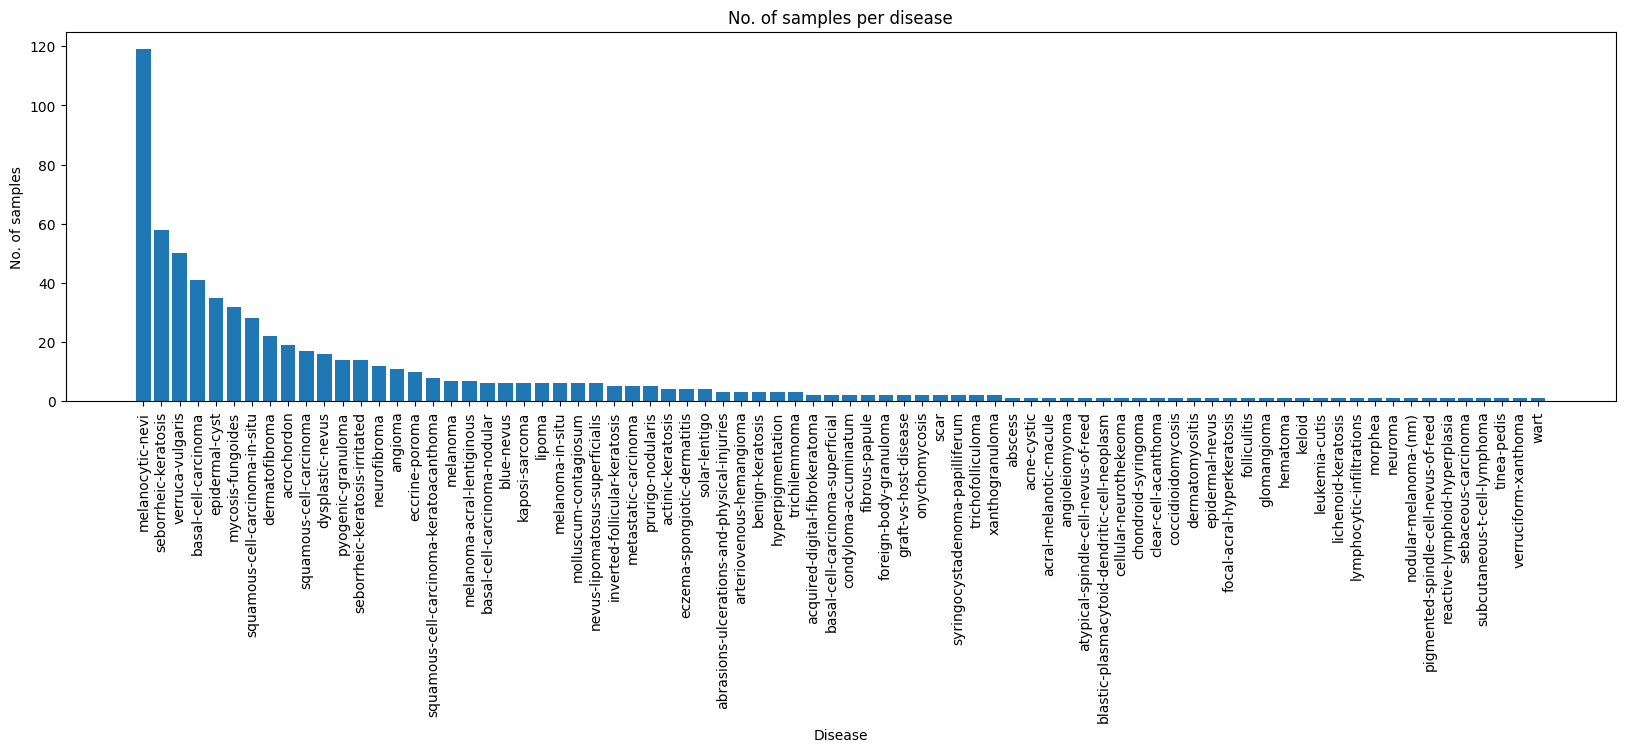

In [93]:
plt.figure(figsize=(20, 4.8))
plt.xticks(range(len(x_sorted)),x_sorted,rotation=90)
plt.bar(x_sorted, y_sorted)
plt.xlabel("Disease")
plt.ylabel("No. of samples")
plt.title("No. of samples per disease")
plt.savefig("samples_bargraph_sorted.png", bbox_inches="tight")
plt.show()